In [1]:
import numpy as np
import fast_spa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

In [2]:
# CONUS
lats = np.linspace(25, 50, 100)
lons = np.linspace(-125, -65, 100)
lats, lons = np.meshgrid(lats, lons)

# 24 hrs
datetime_obj = np.arange("2023-01-01", "2023-01-02", dtype="datetime64[h]").astype("datetime64[ns]")

data = fast_spa.fast_spa(datetime_obj, lats, lons)
data.shape

(5, 24, 100, 100)

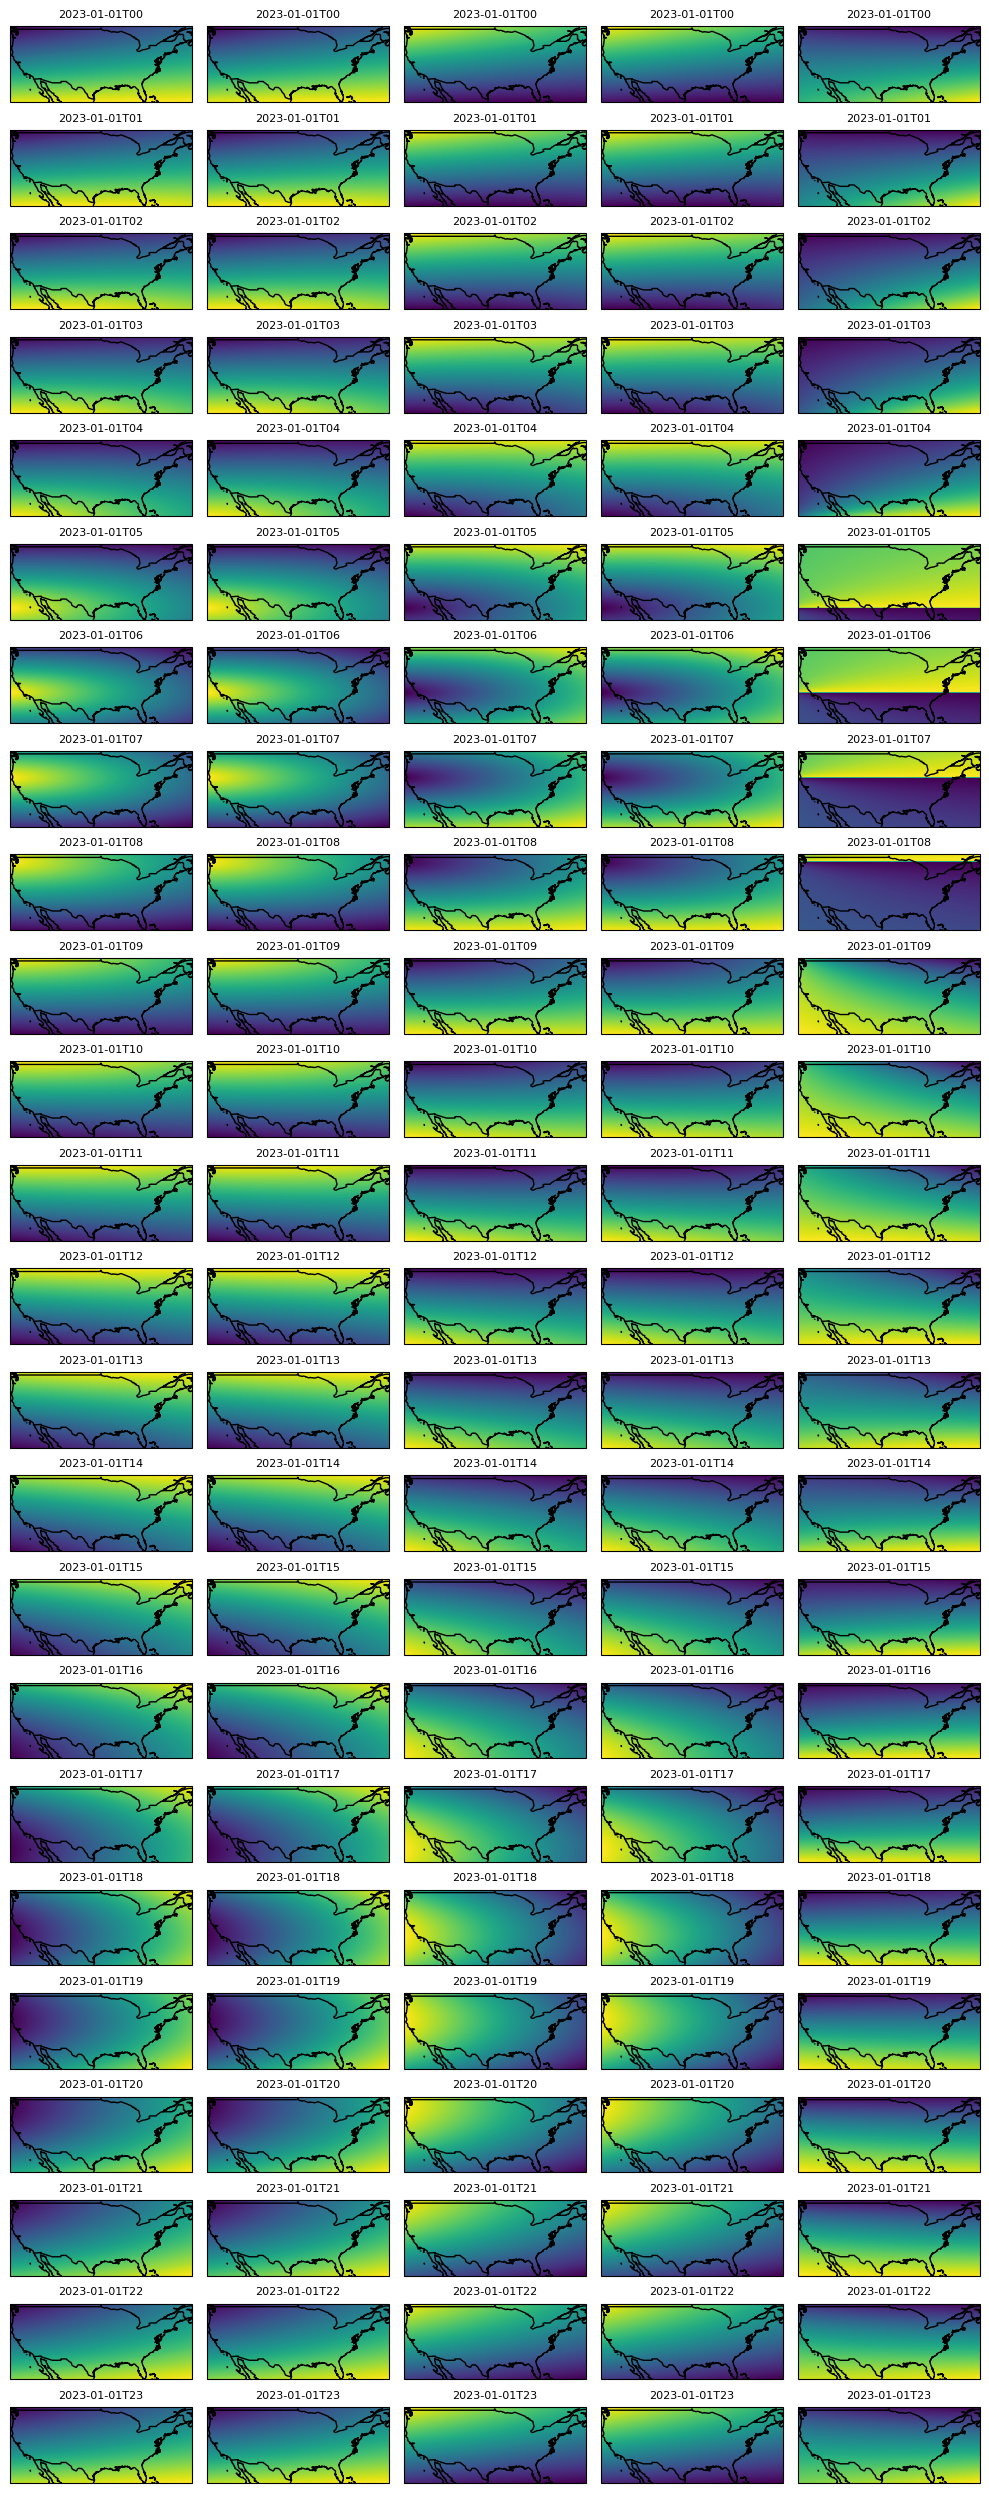

In [3]:
num_channels, num_time = data.shape[:2]
fig, axes = plt.subplots(nrows=num_time, ncols=num_channels, figsize=(10, 25), subplot_kw={"projection": ccrs.PlateCarree()})
extent = [lons.min(), lons.max(), lats.min(), lats.max()]

title =[
    "zenith angle",
    "aparent zenith angle",
    "elevation angle",
    "aparent elevation angle",
    "azimuth angle"
]
fig.tight_layout()


for i in range(num_channels):
    for j in range(num_time):
        ax = axes[j, i]
        assert isinstance(ax, GeoAxes)
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.imshow(data[i, j, :, :], transform=ccrs.PlateCarree(), extent=extent) 
        ax.title.set_text(np.datetime64(datetime_obj[j]).astype('datetime64[h]'))
        ax.set_title(
            np.datetime64(datetime_obj[j]).astype('datetime64[h]'),
            {
                'fontsize': 8,
                'verticalalignment': 'baseline',
                'horizontalalignment': 'center'
            }
        )

